**Intro**
    
    The project aims to explore the Telecast dataset through thorough and detailed analysis. Additionally, it will focus on creating a predictive algorithm using various data to forecast customer categories. Subsequently, the project will investigate hyperparameter optimization based on the analytical outcomes.

**Loading Initial Libraries**

In [1]:
#numpy
import numpy as np

#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#time
import time

**Loading Dataset**

In [2]:
#loading dataset from storage

df = pd.read_csv("teleCust1000t.csv")

In [3]:
#data skim

df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [4]:
#data skim

df.info()

#conclusion: There are no null values, so pre-processing is not necessary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


**Exploratory Data Analysis (EDA)**
    
    Verifying multiple variables prior to advancing with the modeling process.

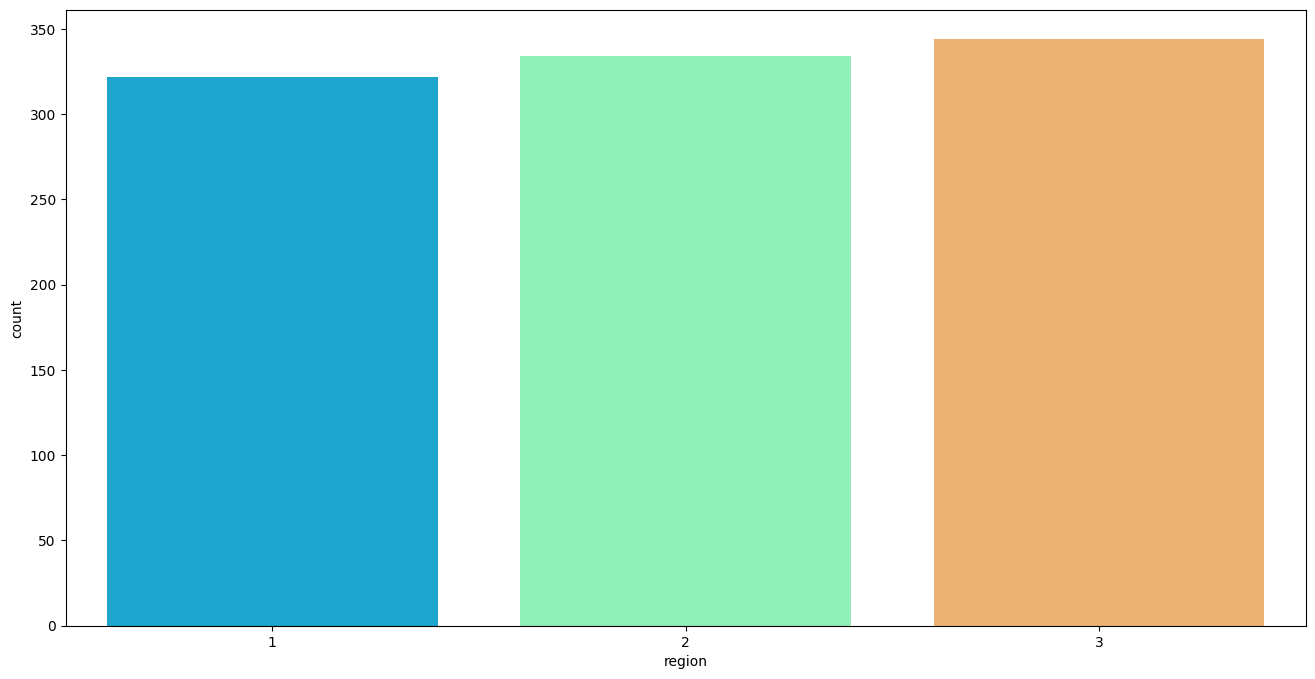

In [5]:
#Checking region variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["region"], data = df, palette = "rainbow")
plt.show()

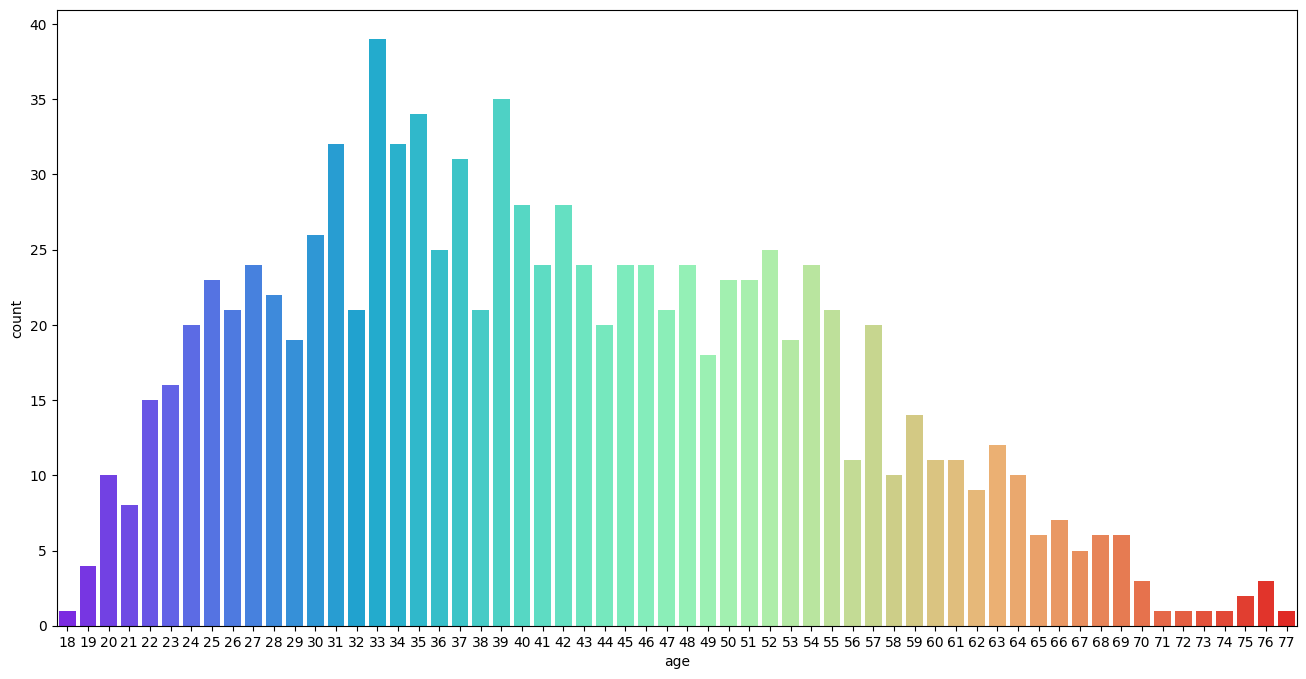

In [6]:
#Checking age variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["age"], data = df, palette = "rainbow")
plt.show()

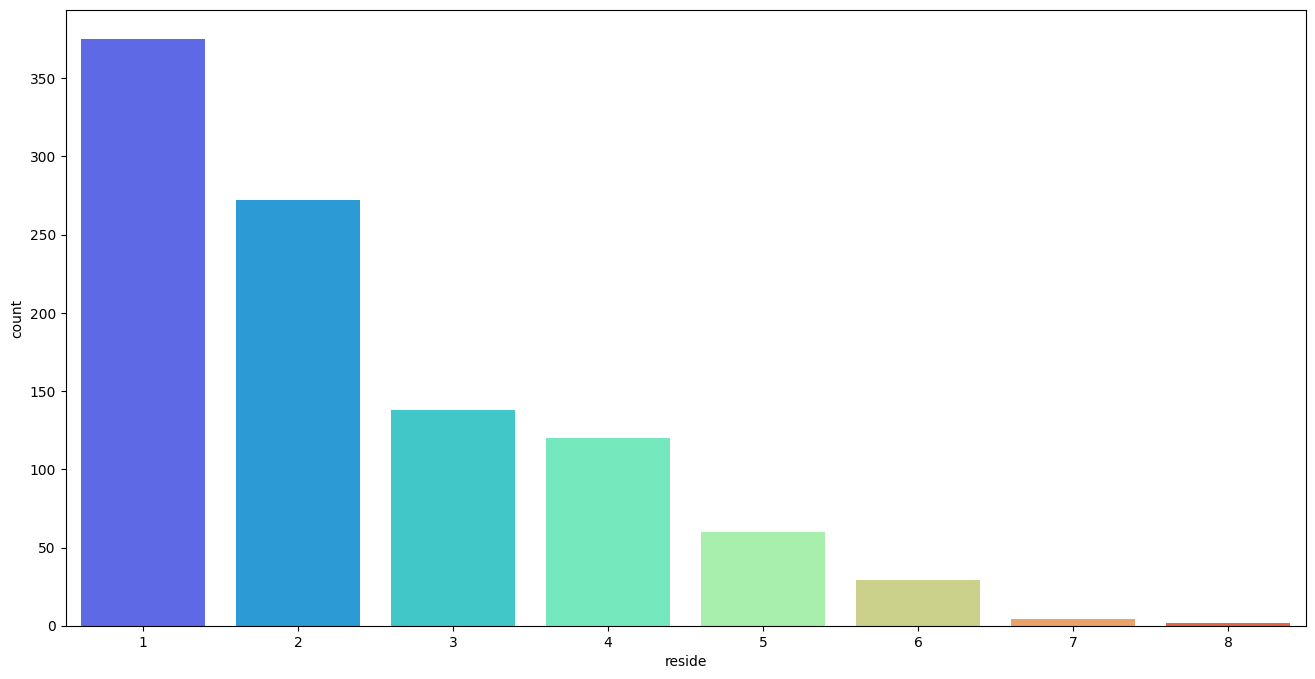

In [7]:
#Checking reside variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["reside"], data = df, palette = "rainbow")
plt.show()

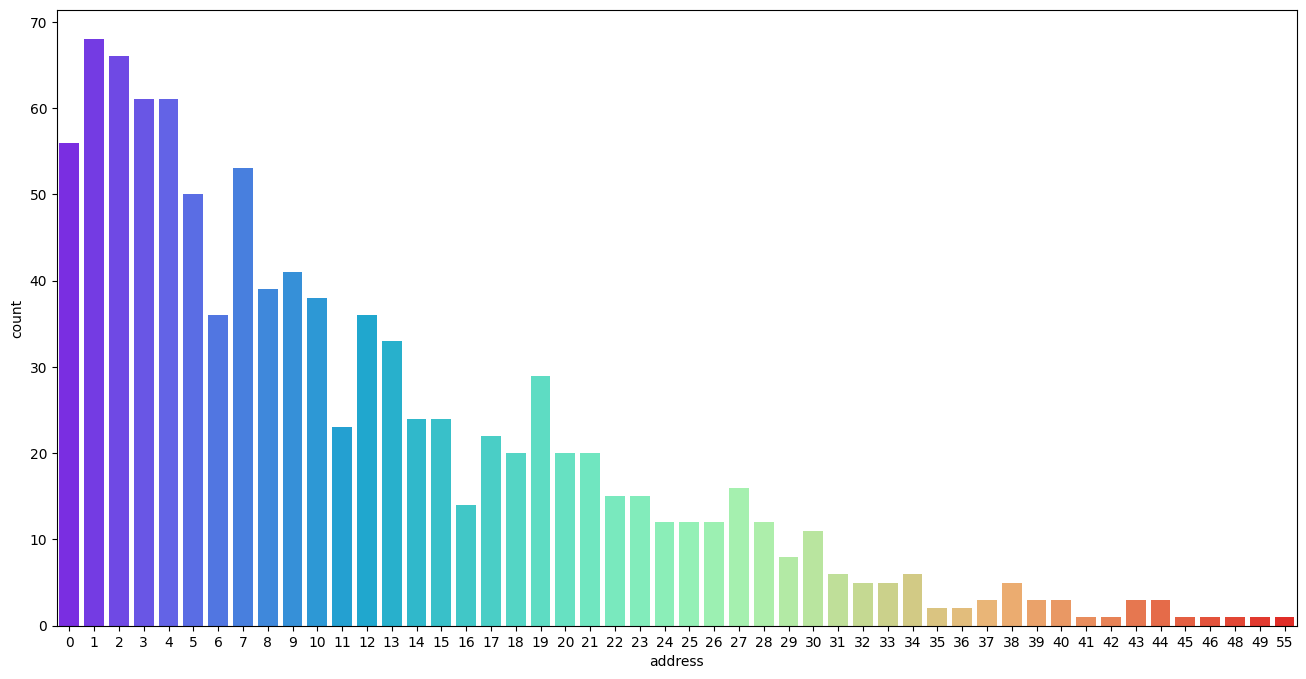

In [8]:
#Checking address variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["address"], data = df, palette = "rainbow")
plt.show()

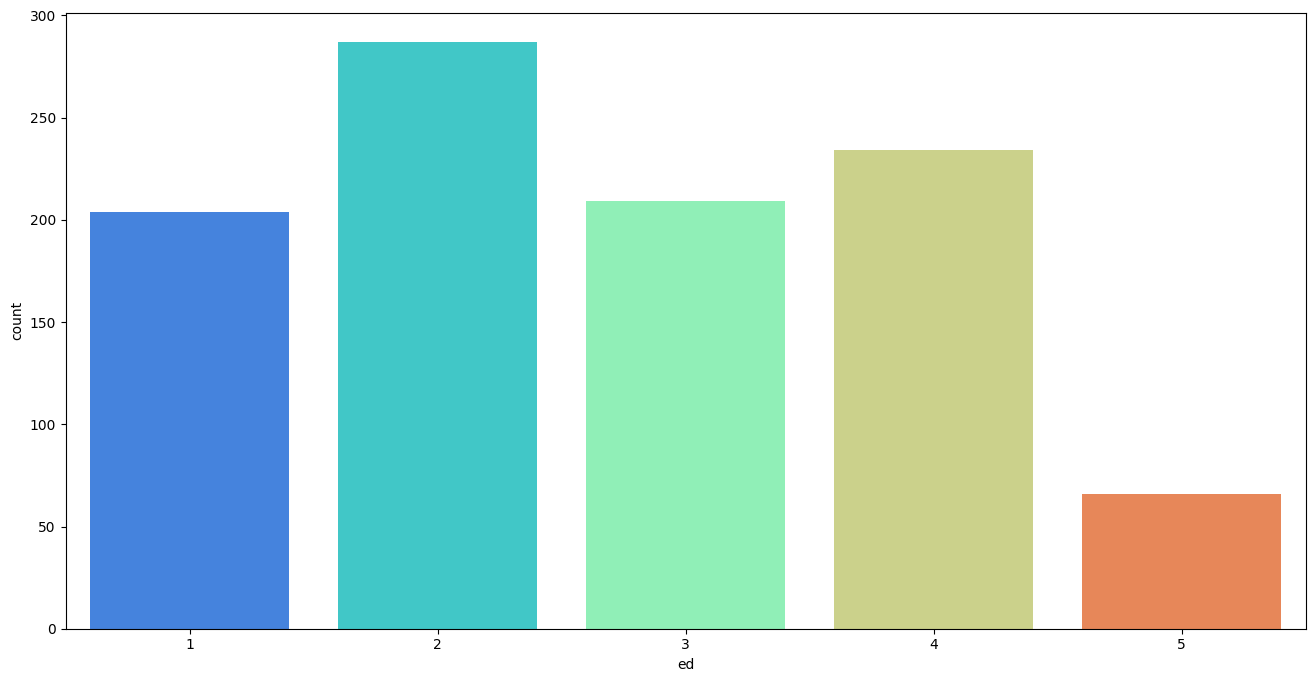

In [9]:
#Checking ed variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["ed"], data = df, palette = "rainbow")
plt.show()

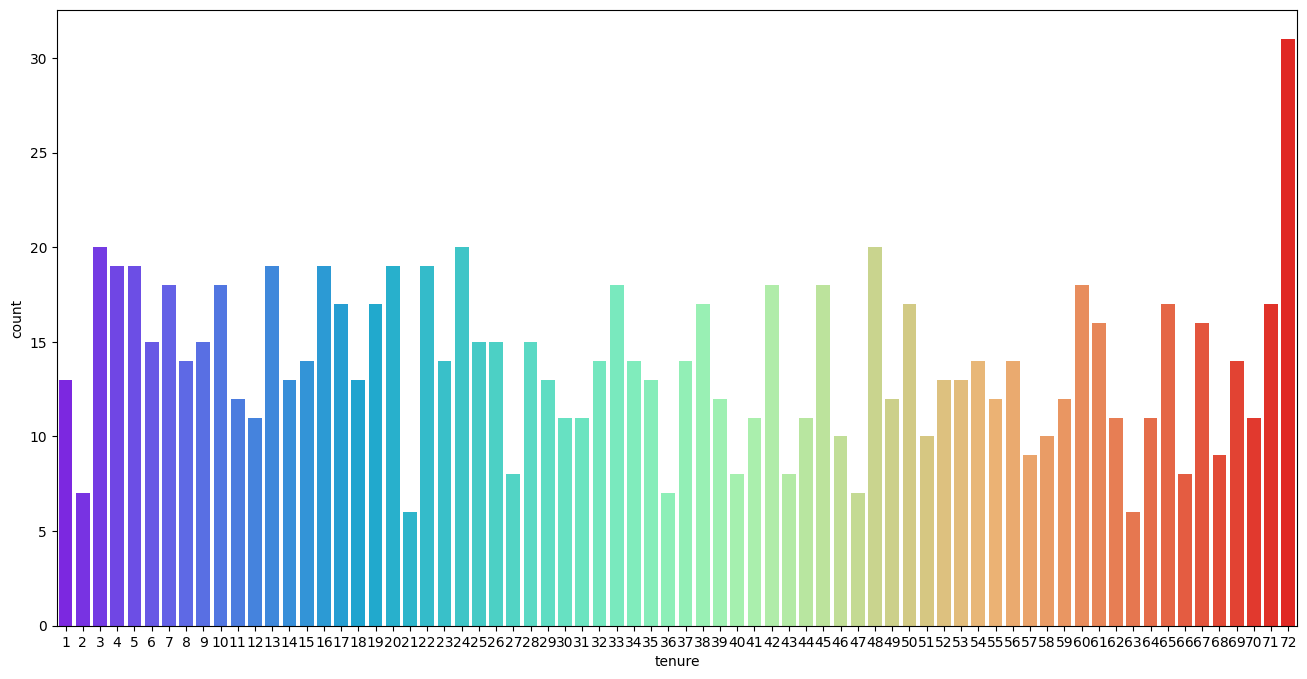

In [10]:
#Checking tenure variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["tenure"], data = df, palette = "rainbow")
plt.show()

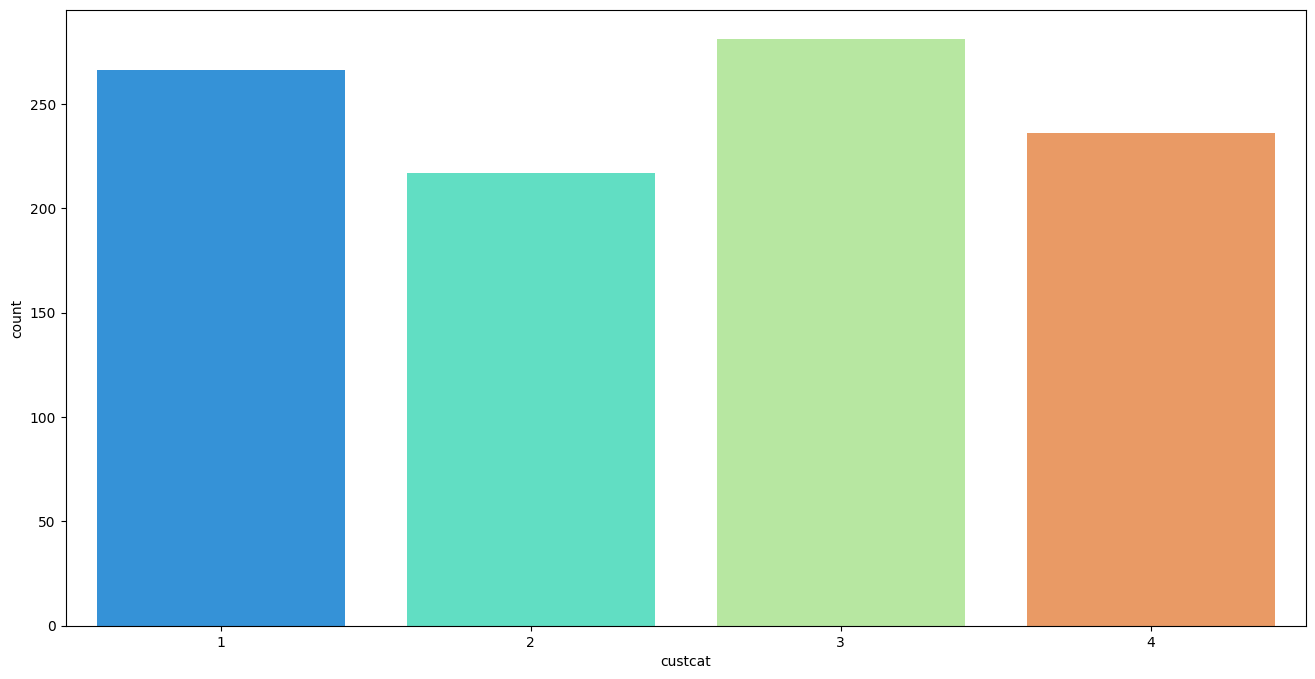

In [11]:
#Checking custcat variable

plt.figure(figsize = (16,8))
sns.countplot(x = df["custcat"], data = df, palette = "rainbow")
plt.show()

**Heatmap of Correlation Matrix**
    
    Initiating a heatmap of the correlation matrix will provide a lot of detail and insight into the relationship between variables with a color scheme for making decisions and modeling data.

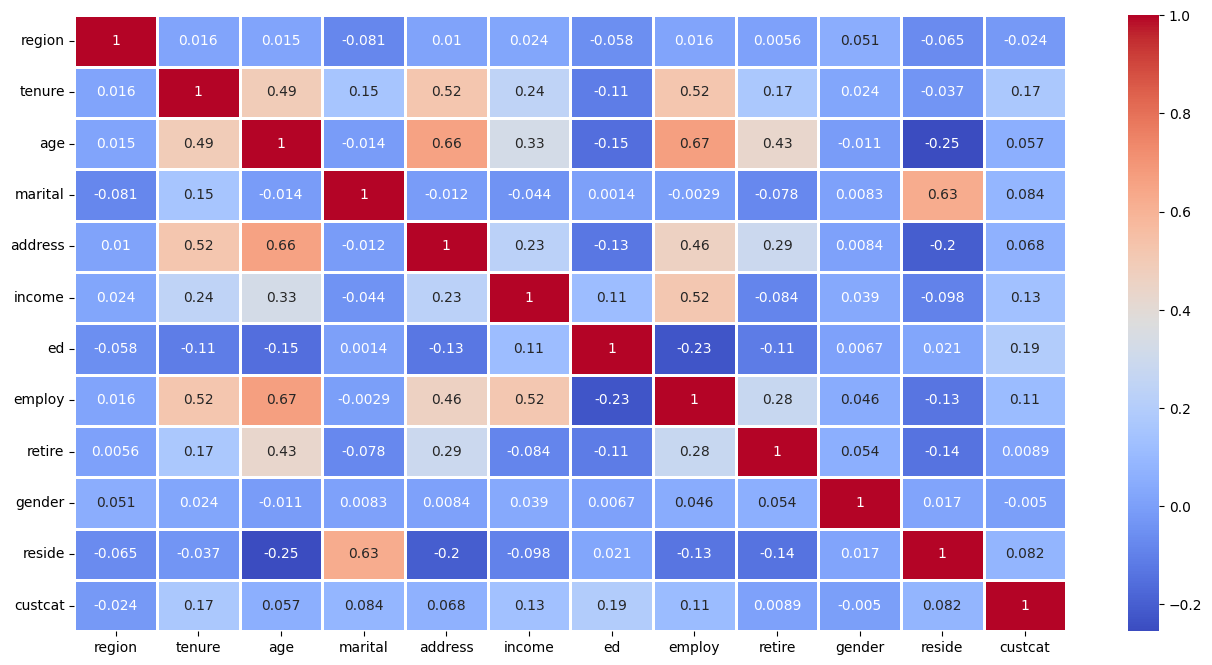

In [12]:
#Heatmap of Correlation Matrix with pd.corr() --->

plt.figure(figsize = (16,8))
teleCust_Hmap = sns.heatmap(data = df.corr(numeric_only = True), annot = True, cmap = "coolwarm", linewidths = 1)
plt.show()
teleCust_Hmap.figure.savefig("teleCust_Hmap.png")

#conclusion: After analyzing the heatmap, it seems that retirement and gender have a very low correlation with the target variable. So, they need to be dropped.
#conclusion 2: All other variables do not show any strong correlation with the target variable, so predicting values based on these variables might not be so great.
#Solutions for conclusion 2 are feature engineering or new data from the source. Will look into it later.

In [13]:
#droping retire and gender variable

df.drop(["retire", "gender"], axis = 1, inplace = True)

#data skim

df.head()

,region,tenure,age,marital,address,income,ed,employ,reside,custcat
0,2,13,44,1,9,64.0,4,5,2,1
1,3,11,33,1,7,136.0,5,5,6,4
2,3,68,52,1,24,116.0,1,29,2,3
3,2,33,33,0,12,33.0,2,0,1,1
4,2,23,30,1,9,30.0,1,2,4,3


In [14]:
#Now, ed, reside, and region variables have a categorical value structure and need to be converted into a binary value structure for better suitability.
#For this function, using pandas.get_dummies() --->

ed = pd.get_dummies(df["ed"], prefix = "ed", dtype = "int")
region = pd.get_dummies(df["region"], prefix = "region", dtype = "int")
reside = pd.get_dummies(df["reside"], prefix = "reside", dtype = "int")

In [15]:
#now dropping these three stock variables.

df.drop(["ed", "region", "reside"], axis = 1, inplace = True)

In [16]:
#adding dummies version of these variables to the main dataframe

df = pd.concat([df, ed, region, reside], axis = 1)

#data skim

df.head()

,tenure,age,marital,address,income,employ,custcat,ed_1,ed_2,ed_3,...,region_2,region_3,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,5,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,5,4,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,68,52,1,24,116.0,29,3,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,33,33,0,12,33.0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,23,30,1,9,30.0,2,3,1,0,0,...,1,0,0,0,0,1,0,0,0,0


**Standardization of variables**

    KNN is a distance-sensitive algorithm, and for such algorithms, standardization of variables is essential. To standardize, the StandardScaler from the Sklearn library can be used.

In [17]:
#importing standard scaler

from sklearn.preprocessing import StandardScaler

In [18]:
#copying out the variables that need to be standardized

scaled_variable = df[["tenure", "age", "address", "income", "employ"]]

#data skim

scaled_variable.head()

,tenure,age,address,income,employ
0,13,44,9,64.0,5
1,11,33,7,136.0,5
2,68,52,24,116.0,29
3,33,33,12,33.0,0
4,23,30,9,30.0,2


In [19]:
#assigning a variable as Standardization object for usage

S_Scaler = StandardScaler()

#preview

S_Scaler

StandardScaler()

In [20]:
#Computing the mean and std to be used for later scaling

S_Scaler.fit(scaled_variable)

StandardScaler()

In [21]:
#now transforming data based on the learning from before; performing standardization by centering and scaling

scaled_variable = S_Scaler.transform(scaled_variable)

In [22]:
#After transforming data, it becomes a numpy array and needs to be converted into a dataframe for data modeling.

DF_scaled = pd.DataFrame(data = scaled_variable, columns = ["tenure", "age", "address", "income", "employ"])

In [23]:
#Skim

DF_scaled

,tenure,age,address,income,employ
0,-1.055125,0.184505,-0.253034,-0.126506,-0.594123
1,-1.148806,-0.691812,-0.451415,0.546450,-0.594123
2,1.521092,0.821826,1.234819,0.359517,1.787528
3,-0.118319,-0.691812,0.044536,-0.416251,-1.090300
4,-0.586722,-0.930808,-0.253034,-0.444291,-0.891829
...,...,...,...,...,...
995,-1.195646,-0.213821,-1.145747,-0.472331,-1.090300
996,-1.336167,-0.612147,-0.947366,-0.519064,-0.594123
997,1.474252,1.379482,2.821863,8.098513,2.184470
998,1.614773,0.582830,0.639678,0.088466,1.092880


In [24]:
#now dropping the non-standardized version of variables from the main dataframe.

df.drop(["tenure", "age", "address", "income", "employ"], axis = 1, inplace = True)

#Skim

df.head()

,marital,custcat,ed_1,ed_2,ed_3,ed_4,ed_5,region_1,region_2,region_3,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,1,4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,1,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [25]:
#Adding the standardized version of variables to the main dataframe

df = pd.concat([df, DF_scaled], axis = 1)

#Skim

df.head()

#conclusion: Data is ready for modeling

,marital,custcat,ed_1,ed_2,ed_3,ed_4,ed_5,region_1,region_2,region_3,...,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income,employ
0,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,-1.055125,0.184505,-0.253034,-0.126506,-0.594123
1,1,4,0,0,0,0,1,0,0,1,...,0,0,1,0,0,-1.148806,-0.691812,-0.451415,0.546450,-0.594123
2,1,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1.521092,0.821826,1.234819,0.359517,1.787528
3,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,-0.118319,-0.691812,0.044536,-0.416251,-1.090300
4,1,3,1,0,0,0,0,0,1,0,...,1,0,0,0,0,-0.586722,-0.930808,-0.253034,-0.444291,-0.891829


**Modeling for Machine Learning (KNN)**

    This section will concentrate on modeling the data using Sklearn's KNN classifier estimator to produce a suitable algorithm. Initially, it will examine a general or snap evaluation using a default configuration. Subsequently, to enhance accuracy, hyperparameter optimization will be considered.   

1. Train Test Split

In [26]:
#splitting data into features (independent) and labels (dependent)

X = df.drop(["custcat"], axis = 1)
y = df["custcat"]

In [27]:
#Importing train_test_split() from the Sk-Learn library

from sklearn.model_selection import train_test_split

In [28]:
#now using train_test_split() to split data.
#setting train data - 80%, test data - 20%, random_state = 45

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

2. Training (Default Setup)

In [29]:
#importing KNN classifier model object from the Sklearns neighbors family

from sklearn.neighbors import KNeighborsClassifier

In [30]:
#assigning KNN estimator to a variable for snap assessment

KNN_Snap = KNeighborsClassifier()

In [31]:
#Preview

KNN_Snap

KNeighborsClassifier()

In [32]:
#Fitting train data into estimator to generate a model

KNN_Snap.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
#Now it's time to generate predict values, based on the testing data, according to this model.

y_predict = KNN_Snap.predict(X_test)

3. Snap Evaluation

In [34]:
#Importing metrics from sklearn for evaluation

from sklearn import metrics

In [35]:
metrics.accuracy_score(y_test, y_predict)

#conclusion: The baseline accuracy of the generated algorithm stands at 35.0%, which is reasonably good considering the low correlation present in the original dataset.

0.35

**Hyperparameter Optimization**

    The Snap Evaluation reveals that the algorithm's accuracy with the default setup stands at 35.0%. While this is commendable considering the dataset's low correlation between the target variable and feature variables, the accuracy remains suboptimal. This section will delve into identifying the appropriate hyperparameter combination using GridSearchCV from Skelearn, aiming to enhance accuracy by considering various configurations.

In [36]:
#importing GridSearch cross validation(CV) model

from sklearn.model_selection import GridSearchCV

In [37]:
#assigning estimator model to a variable for finding the best hyperparameter combination

KNN_HPO = KNeighborsClassifier()

In [38]:
#Preparing a list of parameters to evaluate all possible combinations and determine the one with the optimal performance.

Check_Parameters = {"n_neighbors" : np.arange(0, 100),
                    "weights" : ["uniform", "distance"],
                    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                    "p" : np.arange(0, 10),
                    "metric" : ['cosine', 'euclidean', 'manhattan', 'braycurtis', 'chebyshev', 'minkowski', 'sokalmichener', 'rogerstanimoto', 'yule', 'russellrao', 'hamming', 'jaccard', 'dice']
                   }


In [39]:
#Now, setting the GridSearchCV

KNN_CV = GridSearchCV(estimator = KNN_HPO, param_grid = Check_Parameters, n_jobs = 8, cv = 5, verbose = 5)

In [40]:
#fetching the train data to find out the best parameter combination

#mesuring time

HPO_start_time = time.time()

#Actual Code

KNN_CV.fit(X_train, y_train)

#printing out execution time

print("Time it took to check all combinations ---> %s seconds" % (time.time() - HPO_start_time))

Fitting 5 folds for each of 104000 candidates, totalling 520000 fits
Time it took to check all combinations ---> 852.11669754982 seconds


In [41]:
#after fitting and checking the hyperparameter combinations, checking the best score 

KNN_CV.best_score_

0.39999999999999997

In [42]:
#Checking the best parameter combination

KNN_CV.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 37,
 'p': 5,
 'weights': 'distance'}

In [43]:
#Retraining and evaluating the data with the best parameter combination found in the GridSearch cross-validation to determine whether there is any improvement.

KNN_Best = KNeighborsClassifier()

KNN_Best.set_params(**KNN_CV.best_params_)

KNN_Best.fit(X_train, y_train)

y_predict_Best = KNN_Best.predict(X_test)

metrics.accuracy_score(y_test, y_predict_Best)

0.385

**Project Conclusion**

    The initial accuracy of the algorithm was modest at 35.0%, due to a weak correlation between the target variable and the features in the dataset. However, after some hyperparameter optimization, the accuracy improved to 38.5%, marking a 10% increase from the initial score. While further hyperparameter optimization with a larger set of parameters could potentially increase accuracy, it would also require more computational resources. Acquiring higher-quality data with stronger correlations could contribute to the development of a more effective algorithm.